# Redes Neuronales Convolucionadas (RNC)  

# Modelos Pre-entrenados

# Autor

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

# References 

1.  Ian Goodfellow, Yosua Bengio and Aaron Courville, *Deep Learning*, MIT press, 2016.
2. Vincent Doumolin and Francesco Visin, *A guide to convolution arithmetic for deep learning*, ArXiv:1603.07285v2, 2018
3. https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

# Introducción

## Visualizando capas convolucionales

Los modelos de redes neuronales generalmente se denominan opacos. Esto significa que son pobres para explicar la razón por la cual se tomó una decisión o predicción específica.

Las redes neuronales convolucionales están diseñadas para trabajar con datos de imágenes, y su estructura y función sugieren que debería ser menos inescrutable que otros tipos de redes neuronales.

Específicamente, los modelos se componen de pequeños filtros lineales y el resultado de aplicar filtros llamados mapas de activación, o más generalmente, mapas de características.

Se pueden visualizar tanto filtros como mapas de características.

Por ejemplo, podemos diseñar y comprender pequeños filtros, como detectores de línea. Quizás visualizar los filtros dentro de una red neuronal convolucional aprendida pueda proporcionar una idea de cómo funciona el modelo.

Los mapas de características que resultan de aplicar filtros a las imágenes de entrada y a los mapas de características de las capas anteriores podrían proporcionar una idea de la representación interna que el modelo tiene de una entrada específica en un punto dado del modelo.

Exploraremos ambos enfoques para visualizar una red neuronal convolucional en este tutorial.



# Nuestra imagen

<figure>
<center>
<img src="./Imagenes/bird.jpg" width="800" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">bird.jpg</p>
</figcaption>
</figure>


# Modelo VGG preajustado

Necesitamos un modelo para visualizar.

En lugar de ajustar un modelo desde cero, podemos usar un modelo de clasificación de imágenes previo y de última generación.

Keras proporciona muchos ejemplos de modelos de clasificación de imágenes de alto rendimiento desarrollados por diferentes grupos de investigación para el desafío de reconocimiento visual a gran escala ImageNet, o ILSVRC. Un ejemplo es el modelo VGG-16 que logró los mejores resultados en la competencia de 2014.

Este es un buen modelo para usar para la visualización porque tiene una estructura uniforme simple de capas convolucionales y de agrupación ordenadas en serie, es profunda con 16 capas aprendidas y funcionó muy bien, lo que significa que los filtros y los mapas de características resultantes capturarán características útiles . Para obtener más información sobre este modelo, consulte el documento de 2015 [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/pdf/1409.1556.pdf).

Podemos cargar y resumir el [modelo VGG16](https://keras.io/api/applications/) con solo unas pocas líneas de código; por ejemplo:

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot

In [2]:
# load the model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Cómo visualizar filtros

Quizás la visualización más simple de realizar es trazar los filtros aprendidos directamente.

En la terminología de la red neuronal, los filtros aprendidos son simplemente pesos, pero debido a la estructura bidimensional especializada de los filtros, los valores de peso tienen una relación espacial entre sí y trazar cada filtro como una imagen bidimensional es significativo (o podría ser).

El primer paso es revisar los filtros en el modelo, para ver con qué tenemos que trabajar.

El resumen del modelo impreso en la sección anterior resume la forma de salida de cada capa, p. la forma de los mapas de características resultantes. No da ninguna idea de la forma de los filtros (pesos) en la red, solo el número total de pesos por capa.

Podemos acceder a todas las capas del modelo a través de la propiedad model.layers.

Cada capa tiene una propiedad layer.name, donde las capas convolucionales tienen una convolución de nomenclatura como el bloque # _conv #, donde ‘#‘ es un número entero. Por lo tanto, podemos verificar el nombre de cada capa y omitir cualquiera que no contenga la cadena ‘conv‘.


In [3]:
# summarize filters in each convolutional layer
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


# recupera pesos de la primera capa 

Mostramos gráficamente los filtros de la primera capa

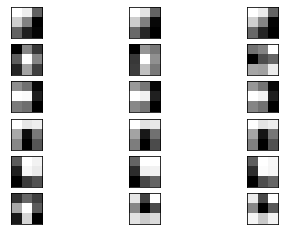

In [4]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()


# Cómo visualizar mapas de características (feature maps)

Los mapas de activación, llamados mapas de características, capturan el resultado de aplicar los filtros a la entrada, como la imagen de entrada u otro mapa de características.

La idea de visualizar un mapa de características para una imagen de entrada específica sería comprender qué características de la entrada se detectan o conservan en los mapas de características. La expectativa sería que los mapas de características cercanos a la entrada detecten detalles pequeños o de grano fino, mientras que los mapas de características cercanos a la salida del modelo capturan características más generales.

Para explorar la visualización de mapas de características, necesitamos información para el modelo VGG16 que pueda usarse para crear activaciones. Utilizaremos una fotografía simple de un pájaro. Específicamente, un Robin, tomado por Chris Heald y liberado bajo una licencia permisiva.

Descargue la fotografía y colóquela en su directorio de trabajo actual con el nombre de archivo. [](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/bird.jpg)

In [5]:
# load the image with the required shape
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from PIL import Image

In [6]:
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('./Imagenes/bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block

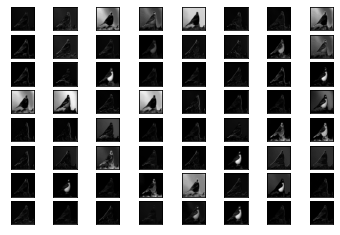

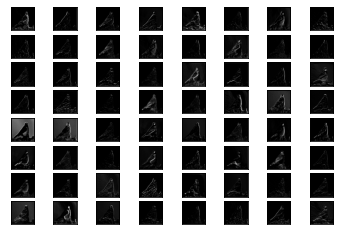

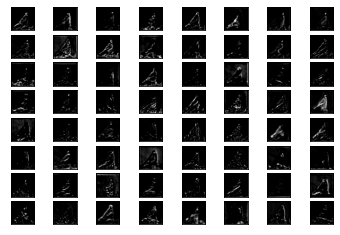

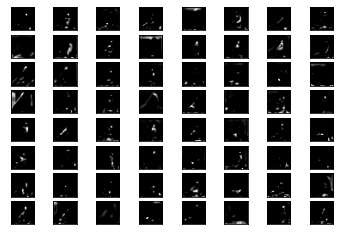

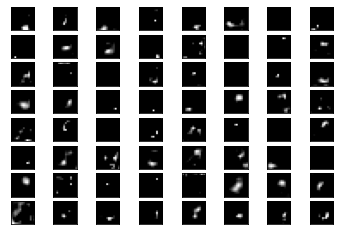

In [7]:
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.figure.figsize=[20.,20.]
    pyplot.show()